RANDOM FOREST CLASSIFIER

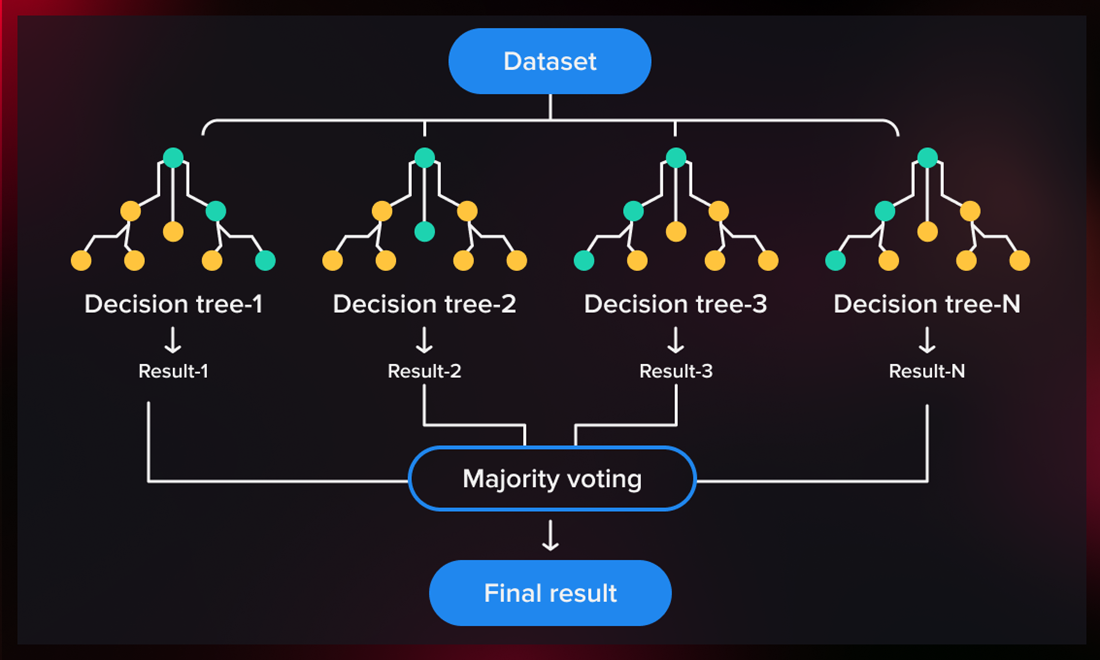

Random Forest is Bagging Ensemble Technique

from warnings import filterwarnings
filterwarnings('ignore')

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

<Axes: title={'center': 'Countplot for Drug'}, xlabel='Drug'>

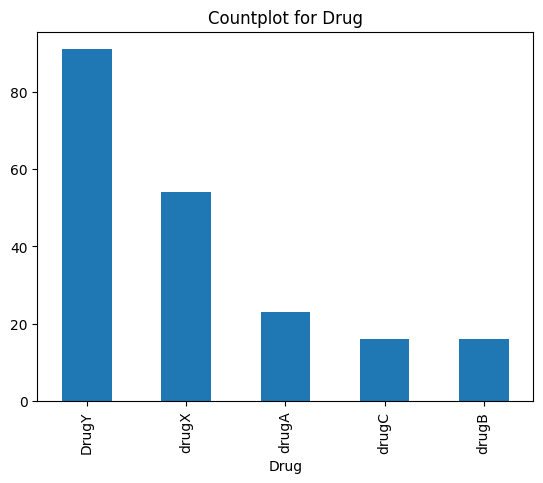

In [7]:
df['Drug'].value_counts().plot(kind='bar', title='Countplot for Drug')

Seperate X and Y features

In [8]:
X = df.drop(columns=['Drug'])
Y = df[['Drug']]

In [9]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [10]:

Y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


Seperate Cat and Con features

In [11]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [12]:
cat

['Sex', 'BP', 'Cholesterol']

In [13]:
con

['Age', 'Na_to_K']

Create a preprocessing pipeline for X
1 num_pipe -a. SimpleImputer strategy='mean' or 'median' b. standardscaler
2 cat_pipe -a. SimpleImputer strategy='most_frequent' or 'constant' b. OneHotEncoder

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [16]:
num_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

cat_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore'))])

pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)])

In [17]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Na_to_K']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'BP', 'Cholesterol'])])

In [18]:
X_pre = pre.fit_transform(X)
X_pre

array([[-1.29159102,  1.28652212,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.16269866, -0.4151454 ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.16269866, -0.82855818,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.46567567, -0.85908883,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       [-1.29159102, -0.28650033,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [-0.26146916, -0.6571702 ,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [19]:
cols = pre.get_feature_names_out()
cols

array(['num__Age', 'num__Na_to_K', 'cat__Sex_F', 'cat__Sex_M',
       'cat__BP_HIGH', 'cat__BP_LOW', 'cat__BP_NORMAL',
       'cat__Cholesterol_HIGH', 'cat__Cholesterol_NORMAL'], dtype=object)

In [20]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.291591,1.286522,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.162699,-0.415145,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.162699,-0.828558,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.988614,-1.149963,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.011034,0.271794,1.0,0.0,0.0,1.0,0.0,1.0,0.0


Apply Train test split

In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.3, random_state=42)

In [22]:
xtrain.shape

(140, 9)

In [23]:

xtest.shape

(60, 9)

In [24]:

xtrain.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
169,-1.473377,-0.669244,1.0,0.0,1.0,0.0,0.0,1.0,0.0
97,0.708057,1.292073,1.0,0.0,1.0,0.0,0.0,1.0,0.0
31,1.798775,-0.904468,0.0,1.0,1.0,0.0,0.0,1.0,0.0
12,-0.079683,-0.098320,0.0,1.0,0.0,1.0,0.0,1.0,0.0
35,0.102103,-1.221155,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [25]:

ytrain.head()

,Drug
169,drugA
97,DrugY
31,drugB
12,DrugY
35,drugX


In [26]:
xtest.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
95,-0.503851,-0.646762,0.0,1.0,0.0,1.0,0.0,0.0,1.0
15,-1.715759,-0.078892,1.0,0.0,1.0,0.0,0.0,0.0,1.0
30,-1.594568,-1.017848,1.0,0.0,0.0,0.0,1.0,0.0,1.0
158,0.889843,-0.782762,1.0,0.0,0.0,1.0,0.0,1.0,0.0
128,0.162699,2.422679,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [27]:

ytest.head()

,Drug
95,drugX
15,DrugY
30,drugX
158,drugC
128,DrugY


In [28]:

ytrain.value_counts()

Drug 
DrugY    65
drugX    36
drugA    16
drugB    13
drugC    10
Name: count, dtype: int64

Create a random forest model

In [29]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1, max_depth=1, min_samples_split=5, min_samples_leaf=3, criterion='gini')
model.fit(xtrain, ytrain)


RandomForestClassifier(max_depth=1, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=1)

In [30]:
model.score(xtrain, ytrain)

0.45714285714285713

In [31]:
model.score(xtest, ytest)

0.4666666666666667

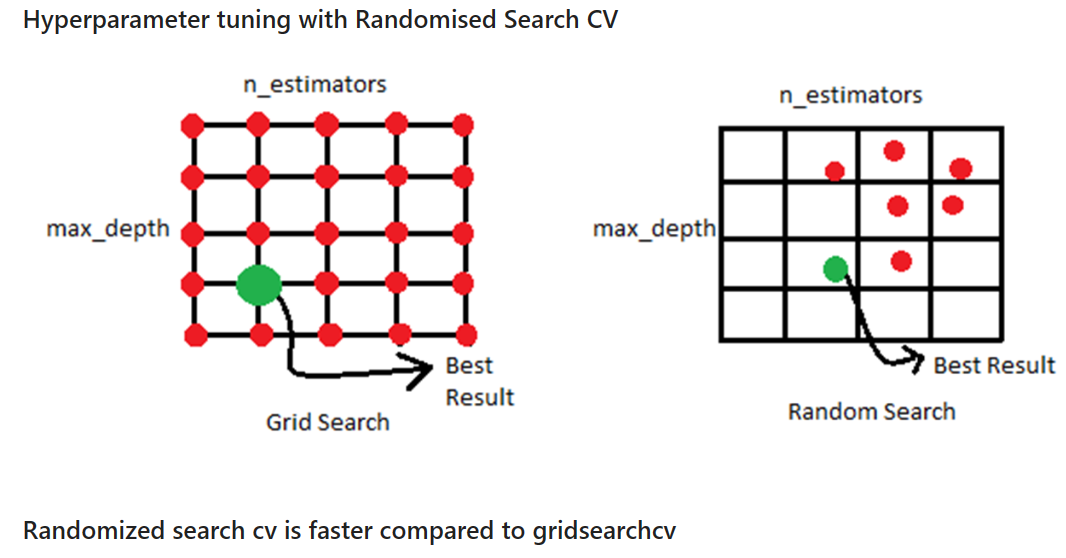

In [32]:
params = {'n_estimators':[10, 50, 100, 200],
          'max_depth':[2, 3, 4, 5, 6, 7],
          'min_samples_split':[5, 6, 7, 8, 9],
          'criterion':['gini', 'entropy']}

In [33]:
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier()
rscv = RandomizedSearchCV(rfc, param_distributions=params, cv=5, scoring='f1_macro')
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_split': [5, 6, 7, 8, 9],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1_macro')

In [34]:
rscv.best_params_

{'n_estimators': 50,
 'min_samples_split': 9,
 'max_depth': 5,
 'criterion': 'entropy'}

In [35]:

rscv.best_score_

0.9862857142857143

In [36]:
best_rfc = rscv.best_estimator_
best_rfc

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=9,
                       n_estimators=50)

Evaluate Model in train and test

In [37]:
best_rfc.score(xtrain, ytrain)

1.0

In [38]:
best_rfc.score(xtest, ytest)

1.0

Predict results for train and test

In [39]:
ypred_tr = best_rfc.predict(xtrain)
ypred_ts = best_rfc.predict(xtest)

In [40]:
ypred_tr[0:5]

array(['drugA', 'DrugY', 'drugB', 'DrugY', 'drugX'], dtype=object)

In [41]:
ytrain.head()

,Drug
169,drugA
97,DrugY
31,drugB
12,DrugY
35,drugX


In [42]:
ytrain.head()

,Drug
169,drugA
97,DrugY
31,drugB
12,DrugY
35,drugX


In [43]:
ypred_ts[0:5]

array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY'], dtype=object)

In [44]:
ytest.head()

,Drug
95,drugX
15,DrugY
30,drugX
158,drugC
128,DrugY


Create confusion matrix for test results

In [45]:
best_rfc.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

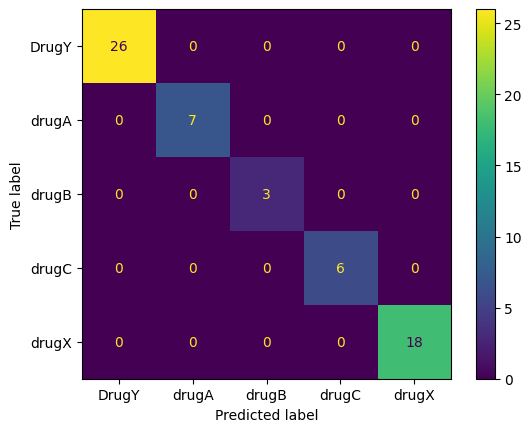

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_rfc.classes_)
cfd.plot()

Create a classification report

In [47]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        26
       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



Predict probabilites

In [48]:
yprob_tr = best_rfc.predict_proba(xtrain)
yprob_ts = best_rfc.predict_proba(xtest)

In [49]:
best_rfc.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

In [50]:

yprob_ts[0:5]

array([[0.06587607, 0.04402625, 0.01071429, 0.09192768, 0.78745571],
       [0.962558  , 0.03161783, 0.00582418, 0.        , 0.        ],
       [0.041     , 0.06038462, 0.00857143, 0.0125    , 0.87754396],
       [0.207946  , 0.00828571, 0.03492063, 0.50602958, 0.24281807],
       [0.91087607, 0.        , 0.        , 0.        , 0.08912393]])

In [51]:
ypred_ts[0:5]

array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY'], dtype=object)

Feature importances

In [52]:
imp = best_rfc.feature_importances_
imp

array([0.10456259, 0.47561575, 0.0116061 , 0.00693339, 0.18618094,
       0.06442276, 0.08695799, 0.02353755, 0.04018294])

In [53]:
xtrain.columns

Index(['num__Age', 'num__Na_to_K', 'cat__Sex_F', 'cat__Sex_M', 'cat__BP_HIGH',
       'cat__BP_LOW', 'cat__BP_NORMAL', 'cat__Cholesterol_HIGH',
       'cat__Cholesterol_NORMAL'],
      dtype='object')

In [54]:
imp = pd.Series(imp)
imp

0    0.104563
1    0.475616
2    0.011606
3    0.006933
4    0.186181
5    0.064423
6    0.086958
7    0.023538
8    0.040183
dtype: float64

In [55]:
imp.index = xtrain.columns
imp

num__Age                   0.104563
num__Na_to_K               0.475616
cat__Sex_F                 0.011606
cat__Sex_M                 0.006933
cat__BP_HIGH               0.186181
cat__BP_LOW                0.064423
cat__BP_NORMAL             0.086958
cat__Cholesterol_HIGH      0.023538
cat__Cholesterol_NORMAL    0.040183
dtype: float64

In [56]:
imp = imp.sort_values(ascending=False)
imp

num__Na_to_K               0.475616
cat__BP_HIGH               0.186181
num__Age                   0.104563
cat__BP_NORMAL             0.086958
cat__BP_LOW                0.064423
cat__Cholesterol_NORMAL    0.040183
cat__Cholesterol_HIGH      0.023538
cat__Sex_F                 0.011606
cat__Sex_M                 0.006933
dtype: float64

<Axes: title={'center': 'Feature Importances'}>

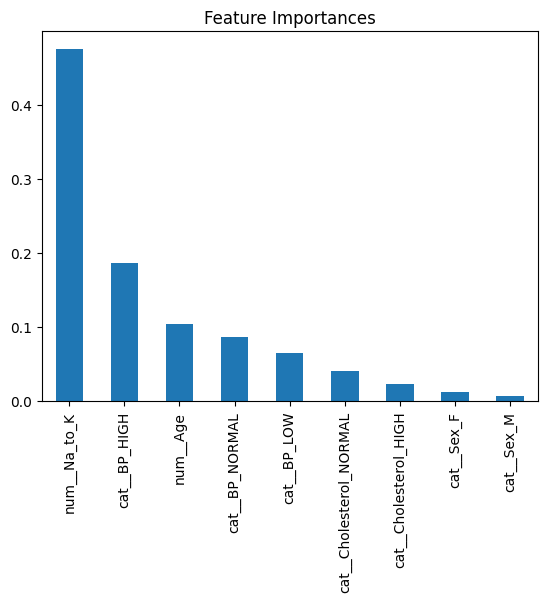

In [57]:
imp.plot(kind='bar', title='Feature Importances')

Predicting Out of sample data

In [58]:
xnew = pd.read_csv('test_drugs.csv')
xnew

,Age,Sex,BP,Cholesterol,Na_to_K
0,26,M,LOW,NORMAL,20.909
1,35,F,HIGH,HIGH,12.894
2,48,M,HIGH,NORMAL,10.446
3,40,F,NORMAL,HIGH,10.103
4,16,M,LOW,HIGH,12.006
5,49,M,HIGH,NORMAL,8.700
6,58,F,LOW,HIGH,26.645
7,28,F,LOW,HIGH,13.127
8,50,F,NORMAL,NORMAL,17.211
9,23,M,LOW,HIGH,7.298


In [59]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          30 non-null     int64  
 1   Sex          30 non-null     object 
 2   BP           30 non-null     object 
 3   Cholesterol  30 non-null     object 
 4   Na_to_K      30 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.3+ KB


Always apply pre.transform

In [60]:
xnew_pre = pre.transform(xnew)
xnew_pre[0:5]

array([[-1.10980481,  0.6695254 ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ],
       [-0.56444618, -0.44276176,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.22329406, -0.78248465,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ],
       [-0.26146916, -0.83008471,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ],
       [-1.71575884, -0.56599457,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ]])

In [61]:
xnew_pre = pd.DataFrame(xnew_pre, columns=cols)
xnew_pre

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.109805,0.669525,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-0.564446,-0.442762,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.223294,-0.782485,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,-0.261469,-0.830085,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,-1.715759,-0.565995,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,0.283889,-1.024787,0.0,1.0,1.0,0.0,0.0,0.0,1.0
6,0.829248,1.465543,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7,-0.988614,-0.410427,1.0,0.0,0.0,1.0,0.0,1.0,0.0
8,0.344485,0.156333,1.0,0.0,0.0,0.0,1.0,0.0,1.0
9,-1.291591,-1.219351,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [62]:
pred = best_rfc.predict(xnew_pre)
pred

array(['DrugY', 'drugA', 'drugA', 'drugX', 'drugC', 'drugA', 'DrugY',
       'drugC', 'DrugY', 'drugC', 'drugX', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'DrugY', 'DrugY', 'drugB', 'DrugY', 'drugX', 'DrugY',
       'DrugY', 'DrugY', 'drugA', 'DrugY', 'DrugY', 'drugB', 'drugC',
       'drugA', 'DrugY'], dtype=object)

In [63]:
prob = best_rfc.predict_proba(xnew_pre)
prob

array([[0.83087607, 0.        , 0.        , 0.03214286, 0.13698107],
       [0.07029487, 0.74795741, 0.13366979, 0.01690909, 0.03116883],
       [0.03609404, 0.76055359, 0.13347751, 0.        , 0.06987485],
       [0.0335    , 0.02649351, 0.        , 0.03639993, 0.90360656],
       [0.04924242, 0.01928571, 0.        , 0.8364551 , 0.09501676],
       [0.04257756, 0.66475689, 0.17990608, 0.        , 0.11275946],
       [0.927946  , 0.        , 0.        , 0.05327195, 0.01878205],
       [0.12406721, 0.01328571, 0.01714286, 0.70438306, 0.14112116],
       [0.86633333, 0.        , 0.        , 0.        , 0.13366667],
       [0.04924242, 0.01928571, 0.        , 0.82502653, 0.10644533],
       [0.05016667, 0.00222222, 0.062     , 0.00953846, 0.87607265],
       [0.81359416, 0.01      , 0.17640584, 0.        , 0.        ],
       [0.95016667, 0.        , 0.        , 0.        , 0.04983333],
       [0.93029487, 0.06970513, 0.        , 0.        , 0.        ],
       [0.86186747, 0.12570829, 0.

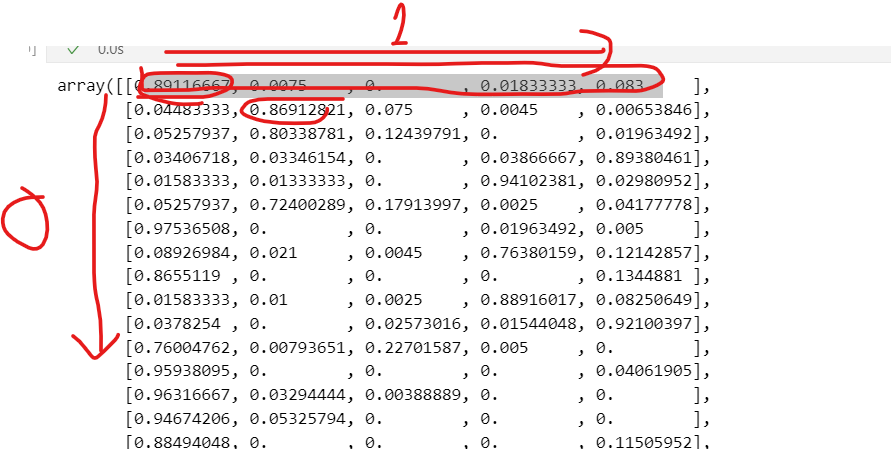

In [64]:
import numpy as np 
prob_max = np.max(prob, axis=1)
prob_max

array([0.83087607, 0.74795741, 0.76055359, 0.90360656, 0.8364551 ,
       0.66475689, 0.927946  , 0.70438306, 0.86633333, 0.82502653,
       0.87607265, 0.81359416, 0.95016667, 0.93029487, 0.86186747,
       0.867     , 0.962558  , 0.62370058, 0.88766162, 0.81357445,
       0.9489697 , 0.91087607, 0.982558  , 0.72600094, 0.962558  ,
       0.86186747, 0.6617286 , 0.82502653, 0.78846812, 0.9214697 ])

In [65]:
xnew['Drug_pred']=pred 
xnew['Drug_prob']=prob_max

In [66]:
xnew['Drug_pred']=pred 
xnew['Drug_prob']=prob_max

In [67]:

xnew

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_pred,Drug_prob
0,26,M,LOW,NORMAL,20.909,DrugY,0.830876
1,35,F,HIGH,HIGH,12.894,drugA,0.747957
2,48,M,HIGH,NORMAL,10.446,drugA,0.760554
3,40,F,NORMAL,HIGH,10.103,drugX,0.903607
4,16,M,LOW,HIGH,12.006,drugC,0.836455
5,49,M,HIGH,NORMAL,8.700,drugA,0.664757
6,58,F,LOW,HIGH,26.645,DrugY,0.927946
7,28,F,LOW,HIGH,13.127,drugC,0.704383
8,50,F,NORMAL,NORMAL,17.211,DrugY,0.866333
9,23,M,LOW,HIGH,7.298,drugC,0.825027


In [68]:
xnew['Drug_pred'].value_counts()

Drug_pred
DrugY    16
drugA     5
drugC     4
drugX     3
drugB     2
Name: count, dtype: int64

<Axes: title={'center': 'Countplot for out of sample predictions'}, xlabel='Drug_pred'>

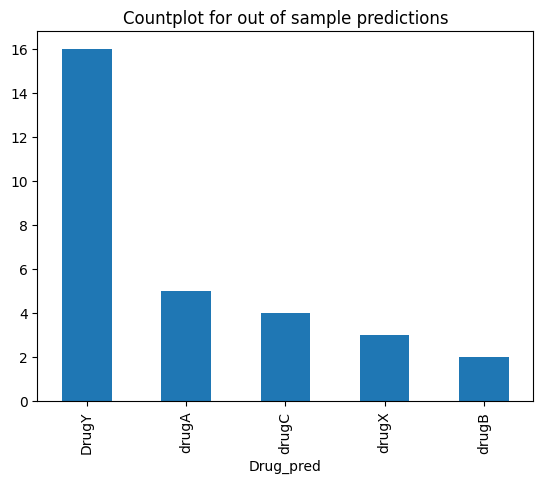

In [69]:
xnew['Drug_pred'].value_counts().plot(kind='bar', title='Countplot for out of sample predictions')

Save above results to csv

In [70]:
xnew.to_csv('Results.csv', index=False)